# Обработка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

plt.style.use('ggplot')
tqdm.pandas()

In [ ]:
news_path = '/content/drive/MyDrive/vk_hack/data.mail.xlsx'

In [ ]:
news_df = pd.read_excel(news_path)
news_df

In [ ]:
all_sheets = pd.read_excel(news_path, sheet_name=None)
print("Sheet names:", list(all_sheets.keys()))
news = []
for sheet_name, df in all_sheets.items():
    combined_text = (df['Title'] + ' ' + df['Description'] + ' ' + df['Article Text'])
    for text in combined_text:
      news.append(text)

len(news)

In [ ]:
news.dropna(inplace=True)
news.shape

In [ ]:
news.drop_duplicates(subset=['text'], inplace=True)
news.shape

In [ ]:
%pip install pymorphy2
import nltk
nltk.download('stopwords')

import pymorphy2
from nltk.corpus import stopwords
import string

In [ ]:
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    if isinstance(text, str):
        tokens = text.split()
        tokens = [word.lower().strip(string.punctuation) for word in tokens]
        lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in stop_words]
        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text
    else:
        return ''

In [ ]:
# tqdm.pandas()
# news['prep_text'] = news['text'].progress_apply(preprocess_text)

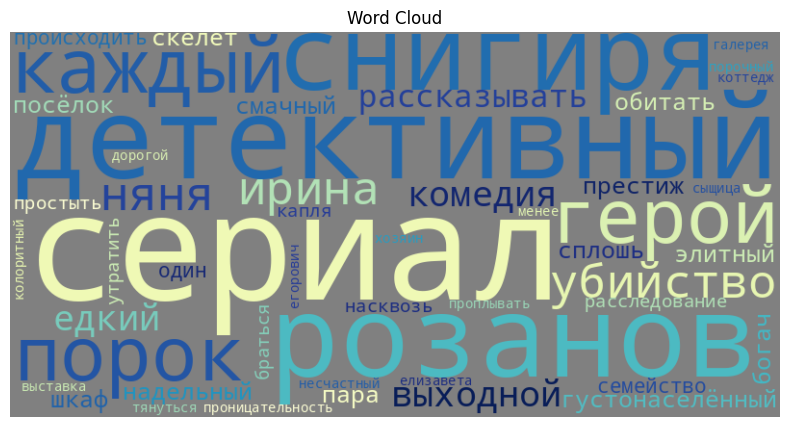

In [ ]:
from wordcloud import WordCloud

wordcloud_params = {
    'width': 800,
    'height': 400,
    'background_color': 'grey',
    'max_words': 50,
    'collocations': True,
    'colormap': 'YlGnBu'
}

wordcloud = WordCloud(**wordcloud_params).generate(txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
news = np.array(news[:500] + news[30000:30500])

# GaussianMixture model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(news)

In [ ]:
gmm = GaussianMixture(n_components=10, random_state=17)
pipeline = make_pipeline(StandardScaler(), gmm)
pipeline.fit(X.toarray())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianmixture',
                 GaussianMixture(n_components=10, random_state=17))])

In [ ]:
cluster_labels = pipeline.predict(X.toarray())
cluster_labels[:100]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 2, 2, 5, 3, 2, 2, 5,
       5, 2, 5, 5, 2, 5, 2, 5, 5, 5, 5, 3, 5, 5, 3, 2, 5, 5, 2, 5, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 4, 5,
       5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 2, 5, 2, 5, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 2, 5, 4, 5, 5])

In [ ]:
cluster_labels[960:]

array([8, 5, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 5, 8, 8, 2, 8, 8, 8, 8, 8, 8, 5, 8])

In [ ]:
for i in range(20):
  print(i, cluster_labels[i], news[i])

0 5 Сериал на выходные: едкая детективная комедия с Розановой и Снигирь Рассказываем о густонаселенном сериале «Престиж», где каждый герой наделен смачным пороком и парой скелетов в шкафу В элитном поселке, где обитают сплошь богачи, происходит убийство няни в одном из семейств. За расследование берется насквозь простывшая, но не утратившая ни капли проницательности сыщица Елизавета Егоровна (Ирина Розанова). Перед ней проплывает галерея порочных и несчастных хозяев дорогих коттеджей, а за ней тянется не менее колоритная выставка нянь: обманщиц и фальшивок. Каждый из этих персонажей может быть виновным в убийстве.  Клептомания, вранье, гордыня, цинизм и обыкновенная глупость — пороков героям отвешено с лихвой. Причем, наделены ими как богатые, так и бедные, что связывает сериал с такими образцами классовой сатиры, как оскароносные «Паразиты» или «Белый лотос». Детективная линия в «Престиже» крепко закручена, но бал здесь правит ирония. При этом многочисленные звездные исполнители, сред

# Silhouette Method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

vectorizer = TfidfVectorizer(max_features=1000)
news = news_lenta.head(1000)
X = vectorizer.fit_transform(news.text)

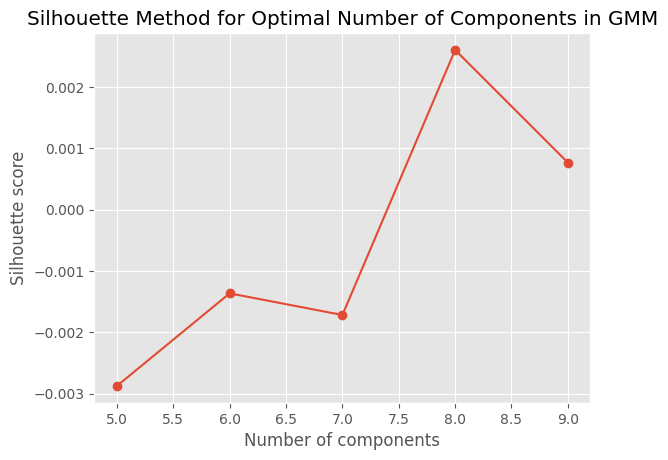

In [ ]:
silhouette_scores = []

for n_components in range(5, 10):
    gmm = GaussianMixture(n_components=n_components, random_state=17)
    pipeline = make_pipeline(StandardScaler(), gmm)
    pipeline.fit(X.toarray())
    cluster_labels = pipeline.predict(X.toarray())

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(5, 10), silhouette_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method for Optimal Number of Components in GMM')
plt.show()

# Lenta dataset

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/vk_hack/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('lenta-ru-news.csv') as file:
        df = pd.read_csv(file)

print(df.head())

                                           url  \
0   https://lenta.ru/news/1914/09/16/hungarnn/   
1  https://lenta.ru/news/1914/09/16/lermontov/   
2  https://lenta.ru/news/1914/09/17/nesteroff/   
3   https://lenta.ru/news/1914/09/17/bulldogn/   
4       https://lenta.ru/news/1914/09/18/zver/   

                                               title  \
0  1914. Русские войска вступили в пределы Венгрии     
1  1914. Празднование столетия М.Ю. Лермонтова от...   
2                           1914. Das ist Nesteroff!   
3                    1914. Бульдог-гонец под Льежем    
4           1914. Под Люблином пойман швабский зверь   

                                                text       topic  \
0  Бои у Сопоцкина и Друскеник закончились отступ...  Библиотека   
1  Министерство народного просвещения, в виду про...  Библиотека   
2  Штабс-капитан П. Н. Нестеров на днях, увидев в...  Библиотека   
3  Фотограф-корреспондент Daily Mirror рассказыва...  Библиотека   
4  Лица, приехавшие в 

<ipython-input-5-7cb714f09921>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [ ]:
df.drop(columns=['url'], inplace=True)
df.dropna(subset=['topic', 'text'], inplace=True)

In [ ]:
df.iloc[548].text

'Государственная Дума приняла сегодня в третьем, заключительномчтении федеральный закон "О гарантировании вкладов граждан вбанках". Lenta.Ru подробно освещала процедуру принятия закона во втором чтении. В нашей статье от 21 сентября 1999 года приведена суть закона, в частности, описание создаваемой Федеральной резервной корпорации, гарантирующей возврат денег, а также величины денежных сумм, подлежащих возврату в случае потери банковского вклада и находящихся в зависимости от его величины. Принятый депутатами закон гарантирует отношения погарантированию вкладов граждан за счет средств Корпорации. Кроме того в документе отмечается, что гарантированиевозвратов вкладов граждан в Сберегательном банке РФосуществляется в порядке предусмотренном федеральным законом. Филиалы иностранных банков на территории РФ также являютсяучастниками системы гарантирования вкладов граждан в банках. Действие этого закона не распространяются на филиалы российскихбанков, находящихся за пределами территории Росс

In [ ]:
df.shape

(738968, 5)

In [ ]:
df.head()

,title,text,topic,tags,date
0,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


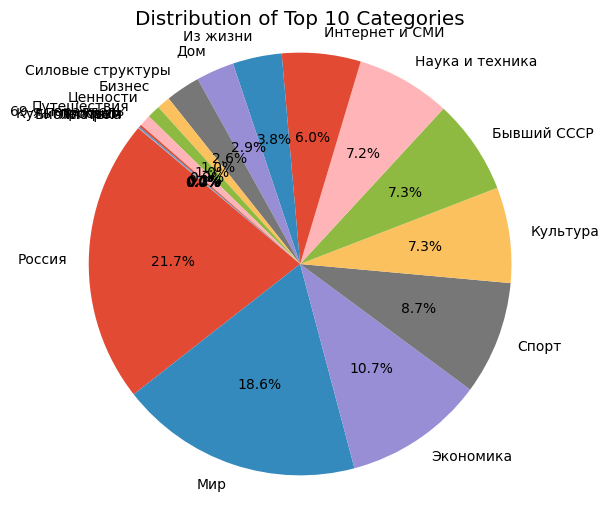

In [ ]:
category_counts = news_lenta['topic'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index,
autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Categories')
plt.axis('equal')
plt.show()

# Keywords extraction

In [ ]:
%pip install yake

In [ ]:
from yake import KeywordExtractor

text = df.iloc[245].text
extractor = KeywordExtractor(dedupLim=0.9, top=3)
keywords = extractor.extract_keywords(text)

for keyword, score in keywords:
    print(keyword)


In [ ]:
news_lenta = df.sample(n=100000)

In [ ]:
def extract_keywords(text):
    extractor = KeywordExtractor(dedupLim=0.9, top=3)
    keywords = extractor.extract_keywords(text)
    keyword_str = ' '.join(set(' '.join(keyword.lower() for keyword, score in keywords).split()))
    return keyword_str

In [ ]:
news_lenta['keywords'] = news_lenta['text'].progress_apply(extract_keywords)
news_lenta

  0%|          | 0/100000 [00:00<?, ?it/s]

,title,text,topic,tags,date,keywords
331213,Обама рассказал о новой стратегии безопасности...,"Американский президент Барак Обама, выступая 2...",Мир,Все,2010/05/23,мая выпускниками перед военной академии
273767,Аэропорты Великобритании недосчитались миллион...,В 2008 году количество пассажиров в аэропортах...,Экономика,Все,2009/03/16,великобритании снизилось aviation впервые auth...
33703,Владимир Ресин: Москва — лидер мирового общепита,Москва по количеству ресторанов и других общеп...,Экономика,Все,2001/08/28,ресин москвы правительства премьера владимир
686495,В Крыму пройдет международный съезд украинских...,В Крыму впервые состоится международный съезд ...,Крым,Все,2017/10/09,стран международный состоится впервые различны...
87084,Бывшие депутаты Госдумы не хотят освобождать с...,Семьи четырех бывших депутатов Госдумы третьег...,Россия,Все,2004/02/06,постановлению суда москвы никулинского согласн...
...,...,...,...,...,...,...
486354,Краб с тремя глазами оказался сиамскими близне...,"Ученые из Германии, Сингапура и Новой Зеландии...",Наука и техника,Наука,2013/11/11,зеландии особь новой обнаружили краба
58250,На мэра Парижа совершено покушение,На мэра Парижа Бертрана Делано (Bertrand Delan...,Мир,Все,2002/10/06,воскресенье парижа делано bertrand покушение d...
432795,Француженка подаст в суд на организаторов реал...,Француженка Мариэль Леридан (Marielle Leuridan...,Интернет и СМИ,Все,2012/08/27,реалити-шоу телевизионных производителя mariel...
582668,Начальник Тихоокеанского командования США посе...,Начальник Тихоокеанского объединенного командо...,Силовые структуры,NaN,2016/02/24,вооруженных гарри сил сша выполнения адмирал з...


# Random forest classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(news_lenta['text'], news_lenta['topic'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)


In [ ]:
y_pred = random_forest_classifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

# AffinityPropagation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(news)

similarity_matrix = cosine_similarity(X)

af = AffinityPropagation(damping=0.5, affinity='precomputed')
af.fit(similarity_matrix)

cluster_centers_indices = af.cluster_centers_indices_

labels = af.labels_

print("Количество кластеров:", len(cluster_centers_indices))
for cluster_center_idx in cluster_centers_indices:
    cluster_center_text = news[cluster_center_idx]
    cluster_members = [news[i] for i, label in enumerate(labels) if label == labels[cluster_center_idx]]
    print("Кластер центр:", cluster_center_text)
    print("Число элементов в кластере:", len(cluster_members))
    print("Элементы кластера:", cluster_members)
    print()


Количество кластеров: 138
Кластер центр: Трейлер дня: Камбербэтч в фильме-катастрофе про мировой потоп Актер вместе со звездой «Убивая Еву» выживает в фильме про апокалипсис Опубликован дублированный трейлер апокалиптического триллера «Всемирный потоп» с Джоди Комер («Убивая Еву») и Бенедиктом Камбербэтчем. Компанию им составила Кэтрин Уотерстон из фэнтези «Фантастические твари и где они обитают», а также Марк Стронг. По сюжету, на Лондон обрушились дожди, и вода затопила весь город. Пока мир находится на грани катастрофы, молодая женщина рожает сына. Чтобы выжить, мать с младенцем отправляются на поиски безопасного убежища, теряя и обретая по дороге разных людей. В российский прокат фильм «Всемирный потоп» выйдет 1 мая 2024 года.
Число элементов в кластере: 5
Элементы кластера: ['Фильм на вечер: атмосферный фильм-катастрофа с неожиданным финалом Погружаемся в апокалиптический триллер о французской семье, бегущей от кислотных дождей Мир охвачен паникой — повсюду наблюдаются аномальные 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

